# Assignment 2

08-07-2023

<span style="color:White; font-family:Georgia; font-size:2em;">J.G.Jerlshin</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./dataset/car crash/train-new.csv")
data.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17565 entries, 0 to 17564
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        17565 non-null  object 
 1   weight       17565 non-null  float64
 2   dead         17565 non-null  object 
 3   airbag       17565 non-null  object 
 4   seatbelt     17565 non-null  object 
 5   frontal      17565 non-null  int64  
 6   sex          17565 non-null  object 
 7   ageOFocc     17565 non-null  int64  
 8   yearacc      17565 non-null  int64  
 9   yearVeh      17565 non-null  int64  
 10  abcat        17565 non-null  object 
 11  occRole      17565 non-null  object 
 12  deploy       17565 non-null  int64  
 13  caseid       17565 non-null  object 
 14  injSeverity  17565 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 2.0+ MB


In [27]:
data.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000
mean,458.763017,0.643439,37.212411,1999.558497,1992.843894,0.340165,1.713066
std,1471.148421,0.478997,17.945232,1.702162,5.568838,0.473778,1.290565
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.264000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,357.283000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


/home/jerlshin/env_ai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


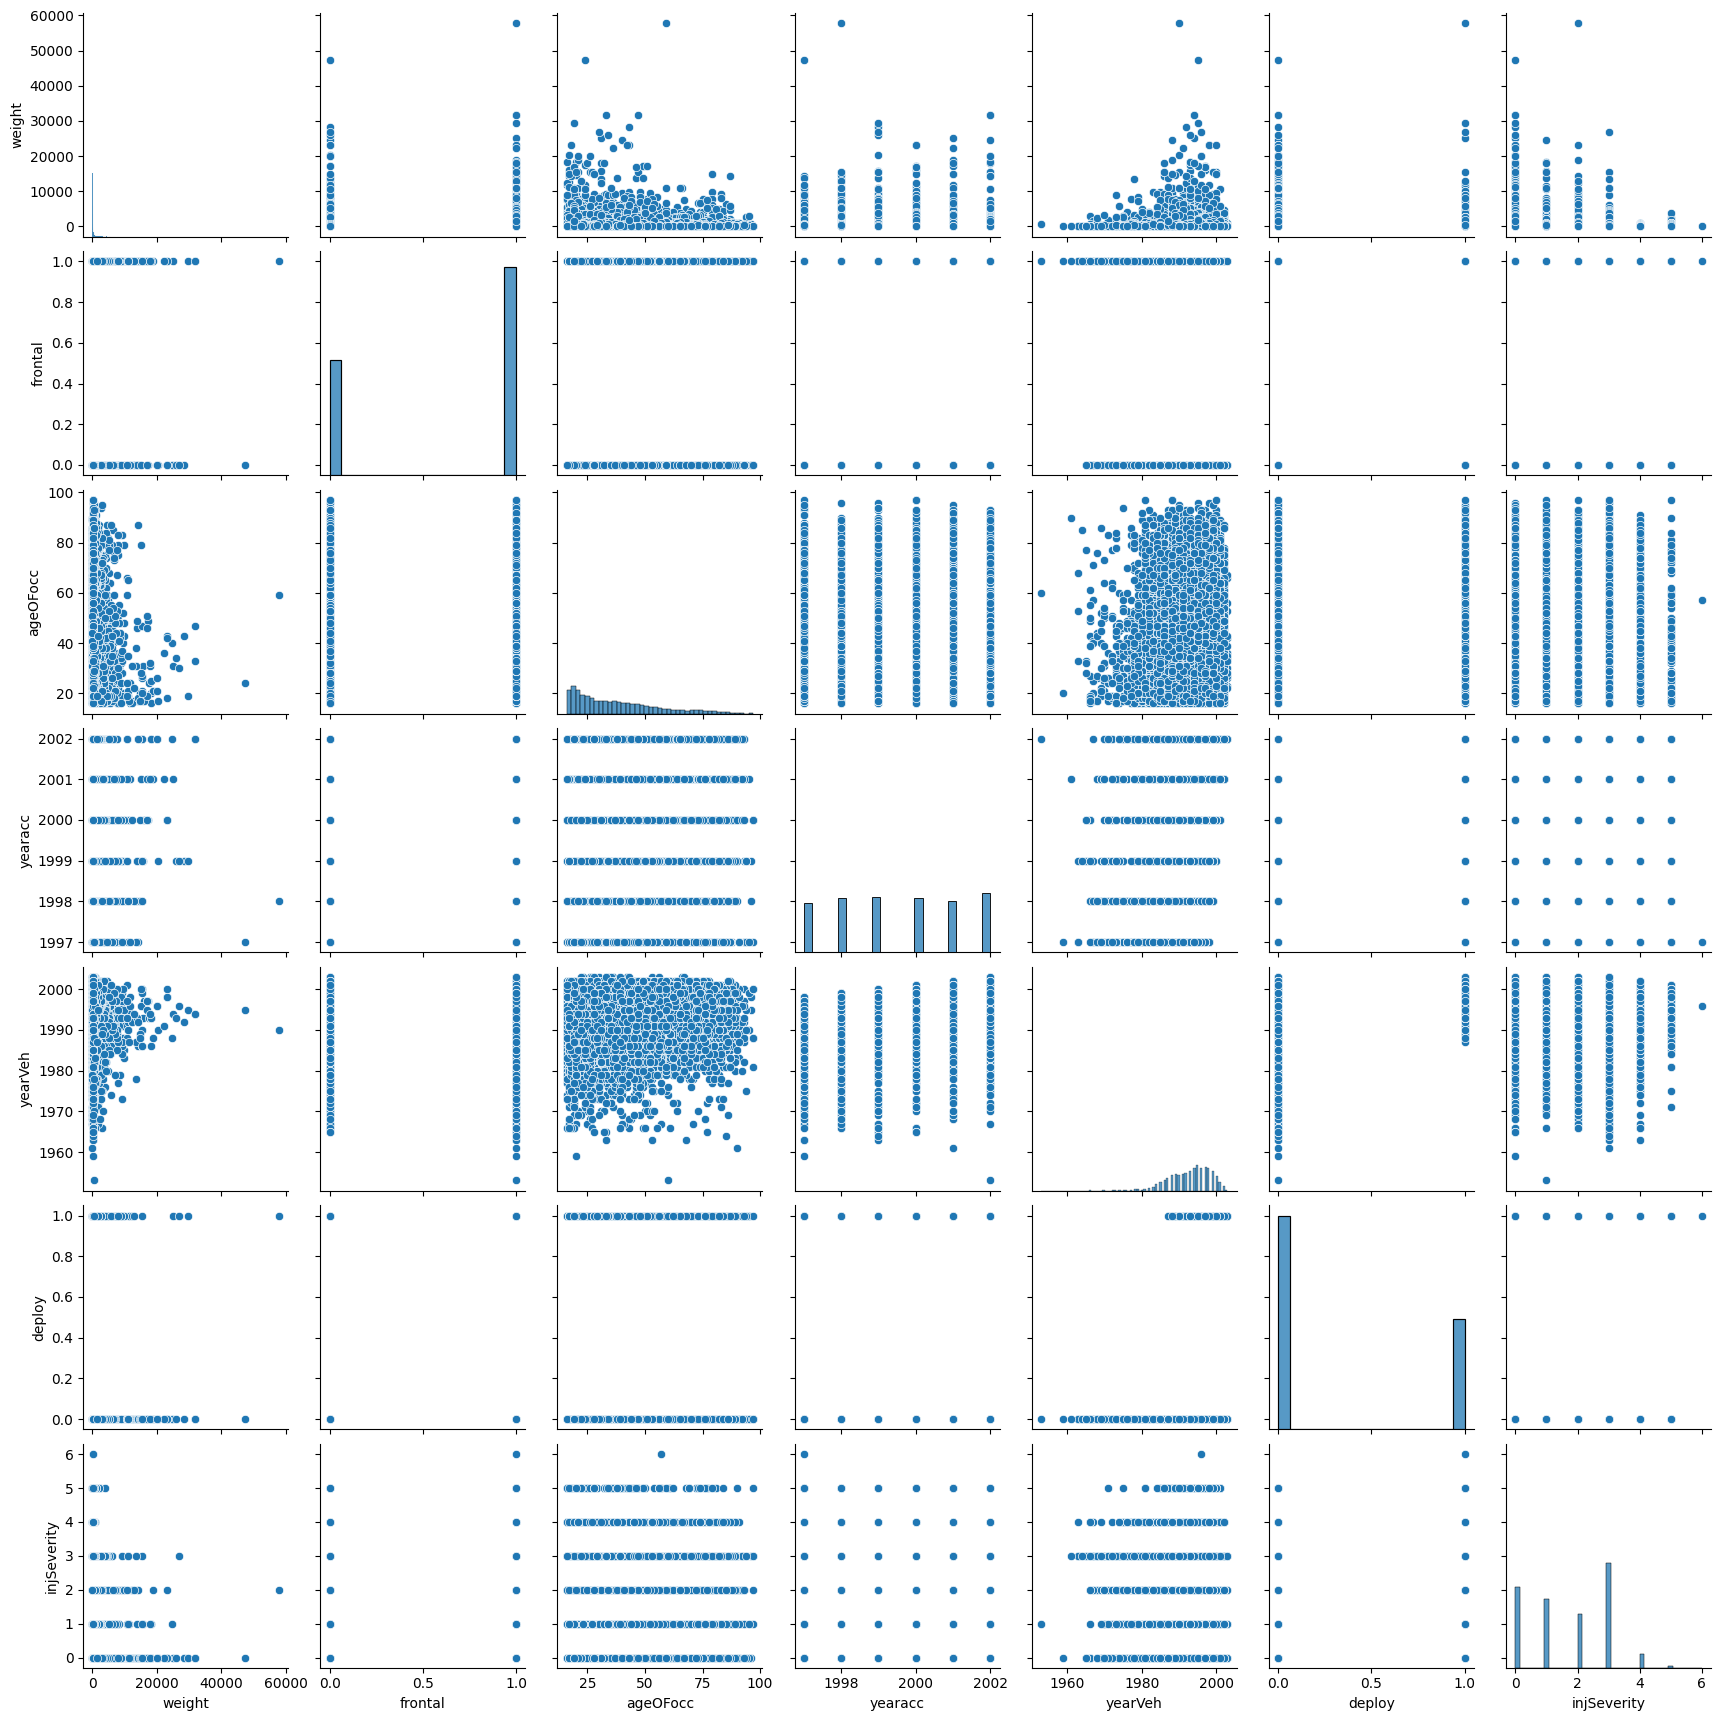

In [3]:
sns.pairplot(data)

In [4]:
len(data)

17565

In [28]:
columns = list(data.columns)

columns

['dvcat',
 'weight',
 'dead',
 'airbag',
 'seatbelt',
 'frontal',
 'sex',
 'ageOFocc',
 'yearacc',
 'yearVeh',
 'abcat',
 'occRole',
 'deploy',
 'caseid',
 'injSeverity']

## Scatter

<function matplotlib.pyplot.show(close=None, block=None)>

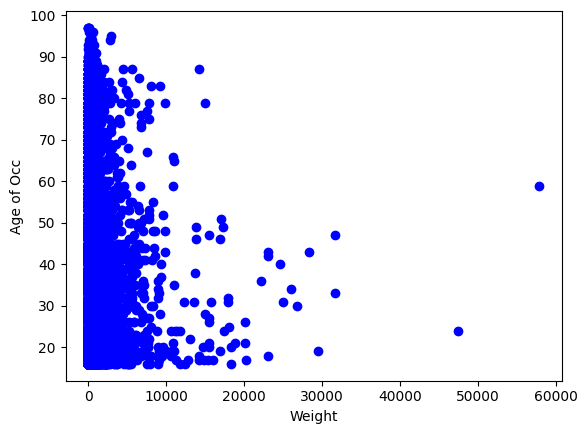

In [16]:
x = data['weight']
y = data['ageOFocc']

plt.scatter(x,y,color='blue')
plt.xlabel('Weight')
plt.ylabel('Age of Occ')
plt.show

## Heat Map

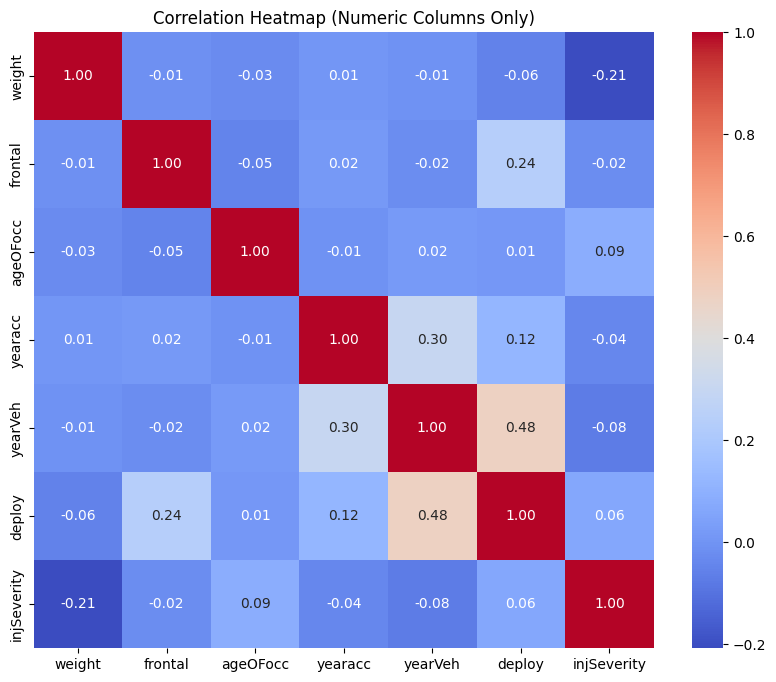

In [39]:
# only the numeric columns from the dataset
numeric_columns = data.select_dtypes(include=['number'])

# correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


(array([5599., 3047., 2577., 2122., 1497.,  907.,  734.,  681.,  347.,
          54.]),
 array([16. , 24.1, 32.2, 40.3, 48.4, 56.5, 64.6, 72.7, 80.8, 88.9, 97. ]),
 <BarContainer object of 10 artists>)

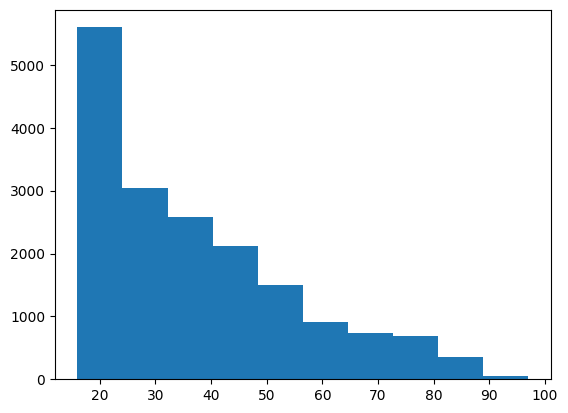

In [22]:
plt.hist(y)

## Hist Plot

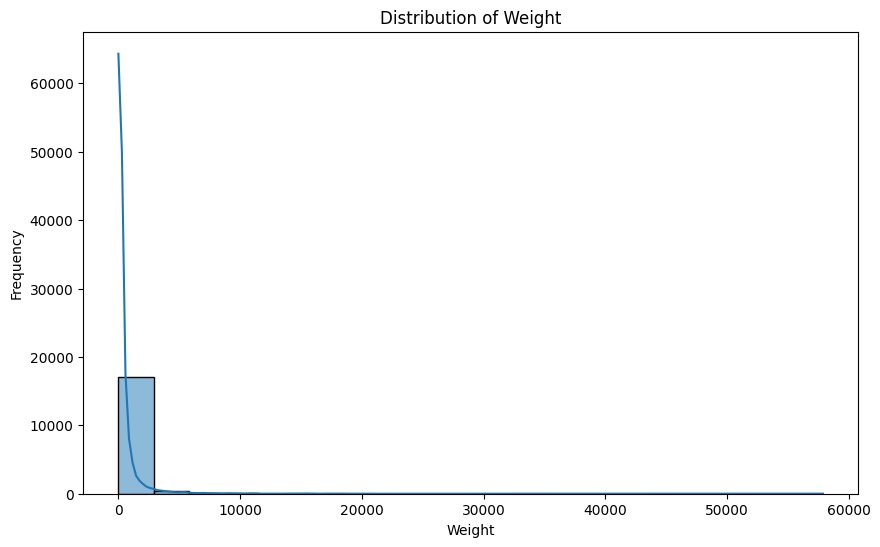

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='weight', bins=20, kde=True)
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weight')
plt.show()

## Count Plot

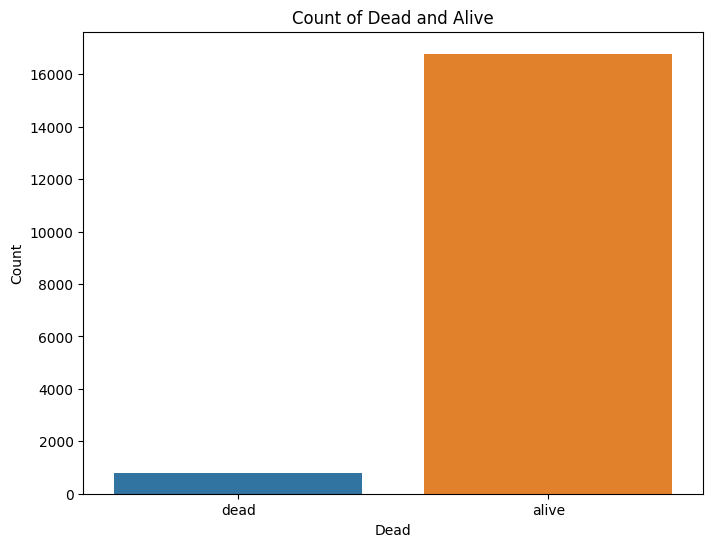

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='dead')
plt.xlabel('Dead')
plt.ylabel('Count')
plt.title('Count of Dead and Alive')
plt.show()

## Count Plot

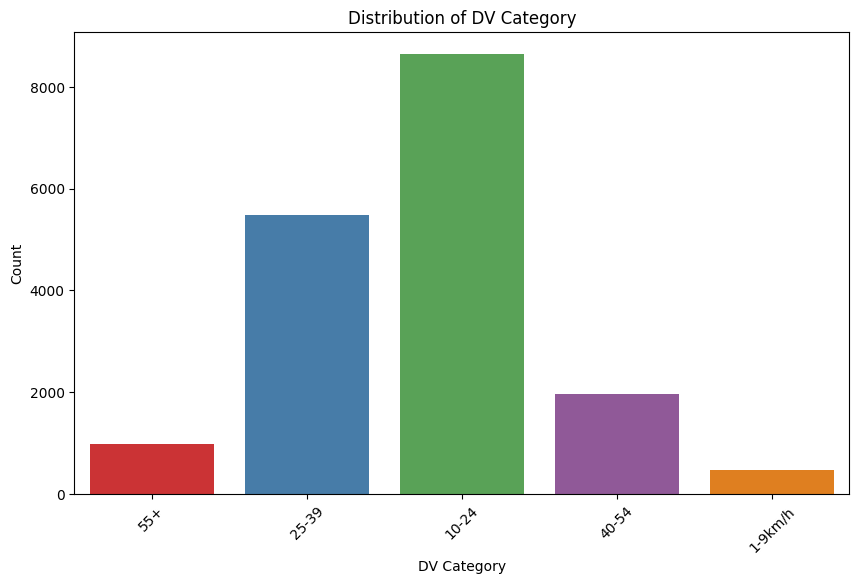

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='dvcat', palette='Set1')
plt.xlabel('DV Category')
plt.ylabel('Count')
plt.title('Distribution of DV Category')
plt.xticks(rotation=45)
plt.show()

## Box Plot

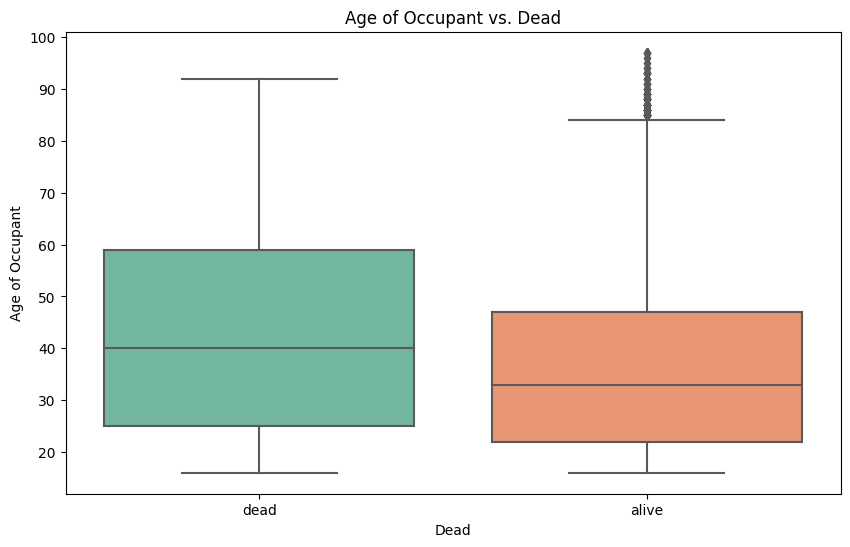

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='dead', y='ageOFocc', palette='Set2')
plt.xlabel('Dead')
plt.ylabel('Age of Occupant')
plt.title('Age of Occupant vs. Dead')
plt.show()

## Violin Plot

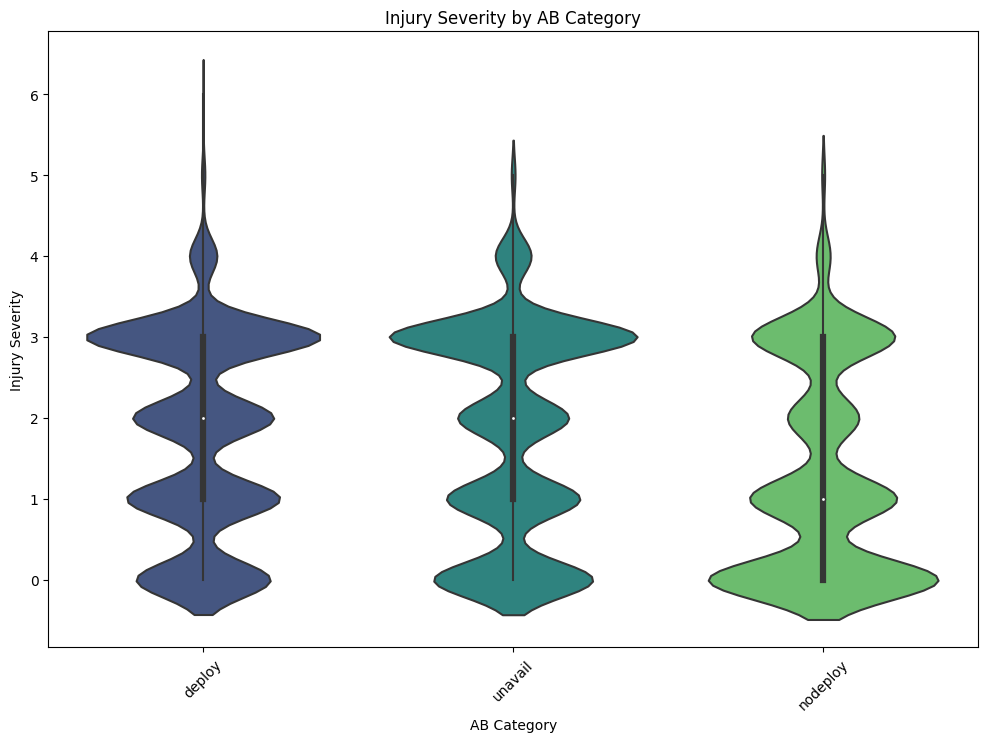

In [33]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='abcat', y='injSeverity', palette='viridis')
plt.xlabel('AB Category')
plt.ylabel('Injury Severity')
plt.title('Injury Severity by AB Category')
plt.xticks(rotation=45)
plt.show()

## Pair Plot

/home/jerlshin/env_ai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


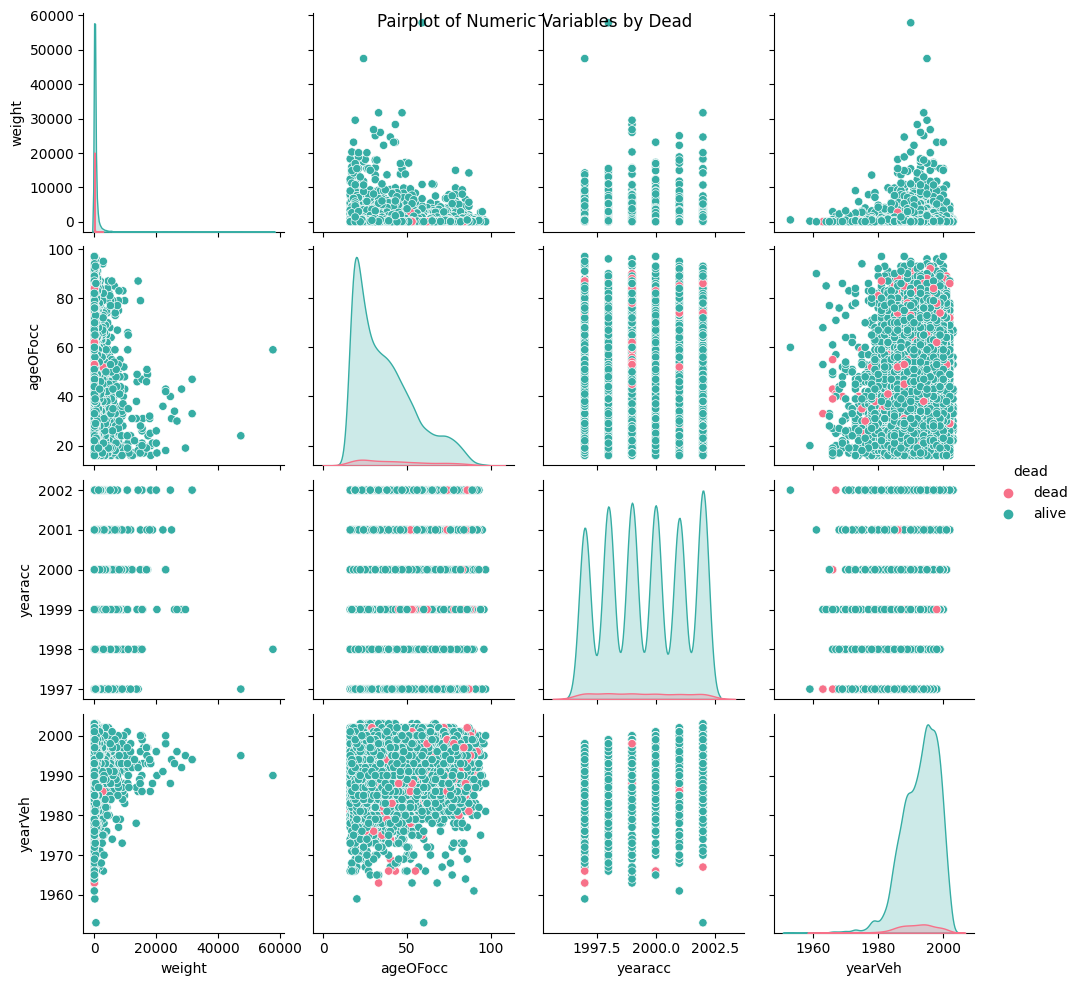

In [34]:
numeric_columns = ['weight', 'ageOFocc', 'yearacc', 'yearVeh']
sns.pairplot(data=data, vars=numeric_columns, hue='dead', palette='husl')
plt.suptitle('Pairplot of Numeric Variables by Dead')
plt.show()

## Pair Plot

/home/jerlshin/env_ai/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

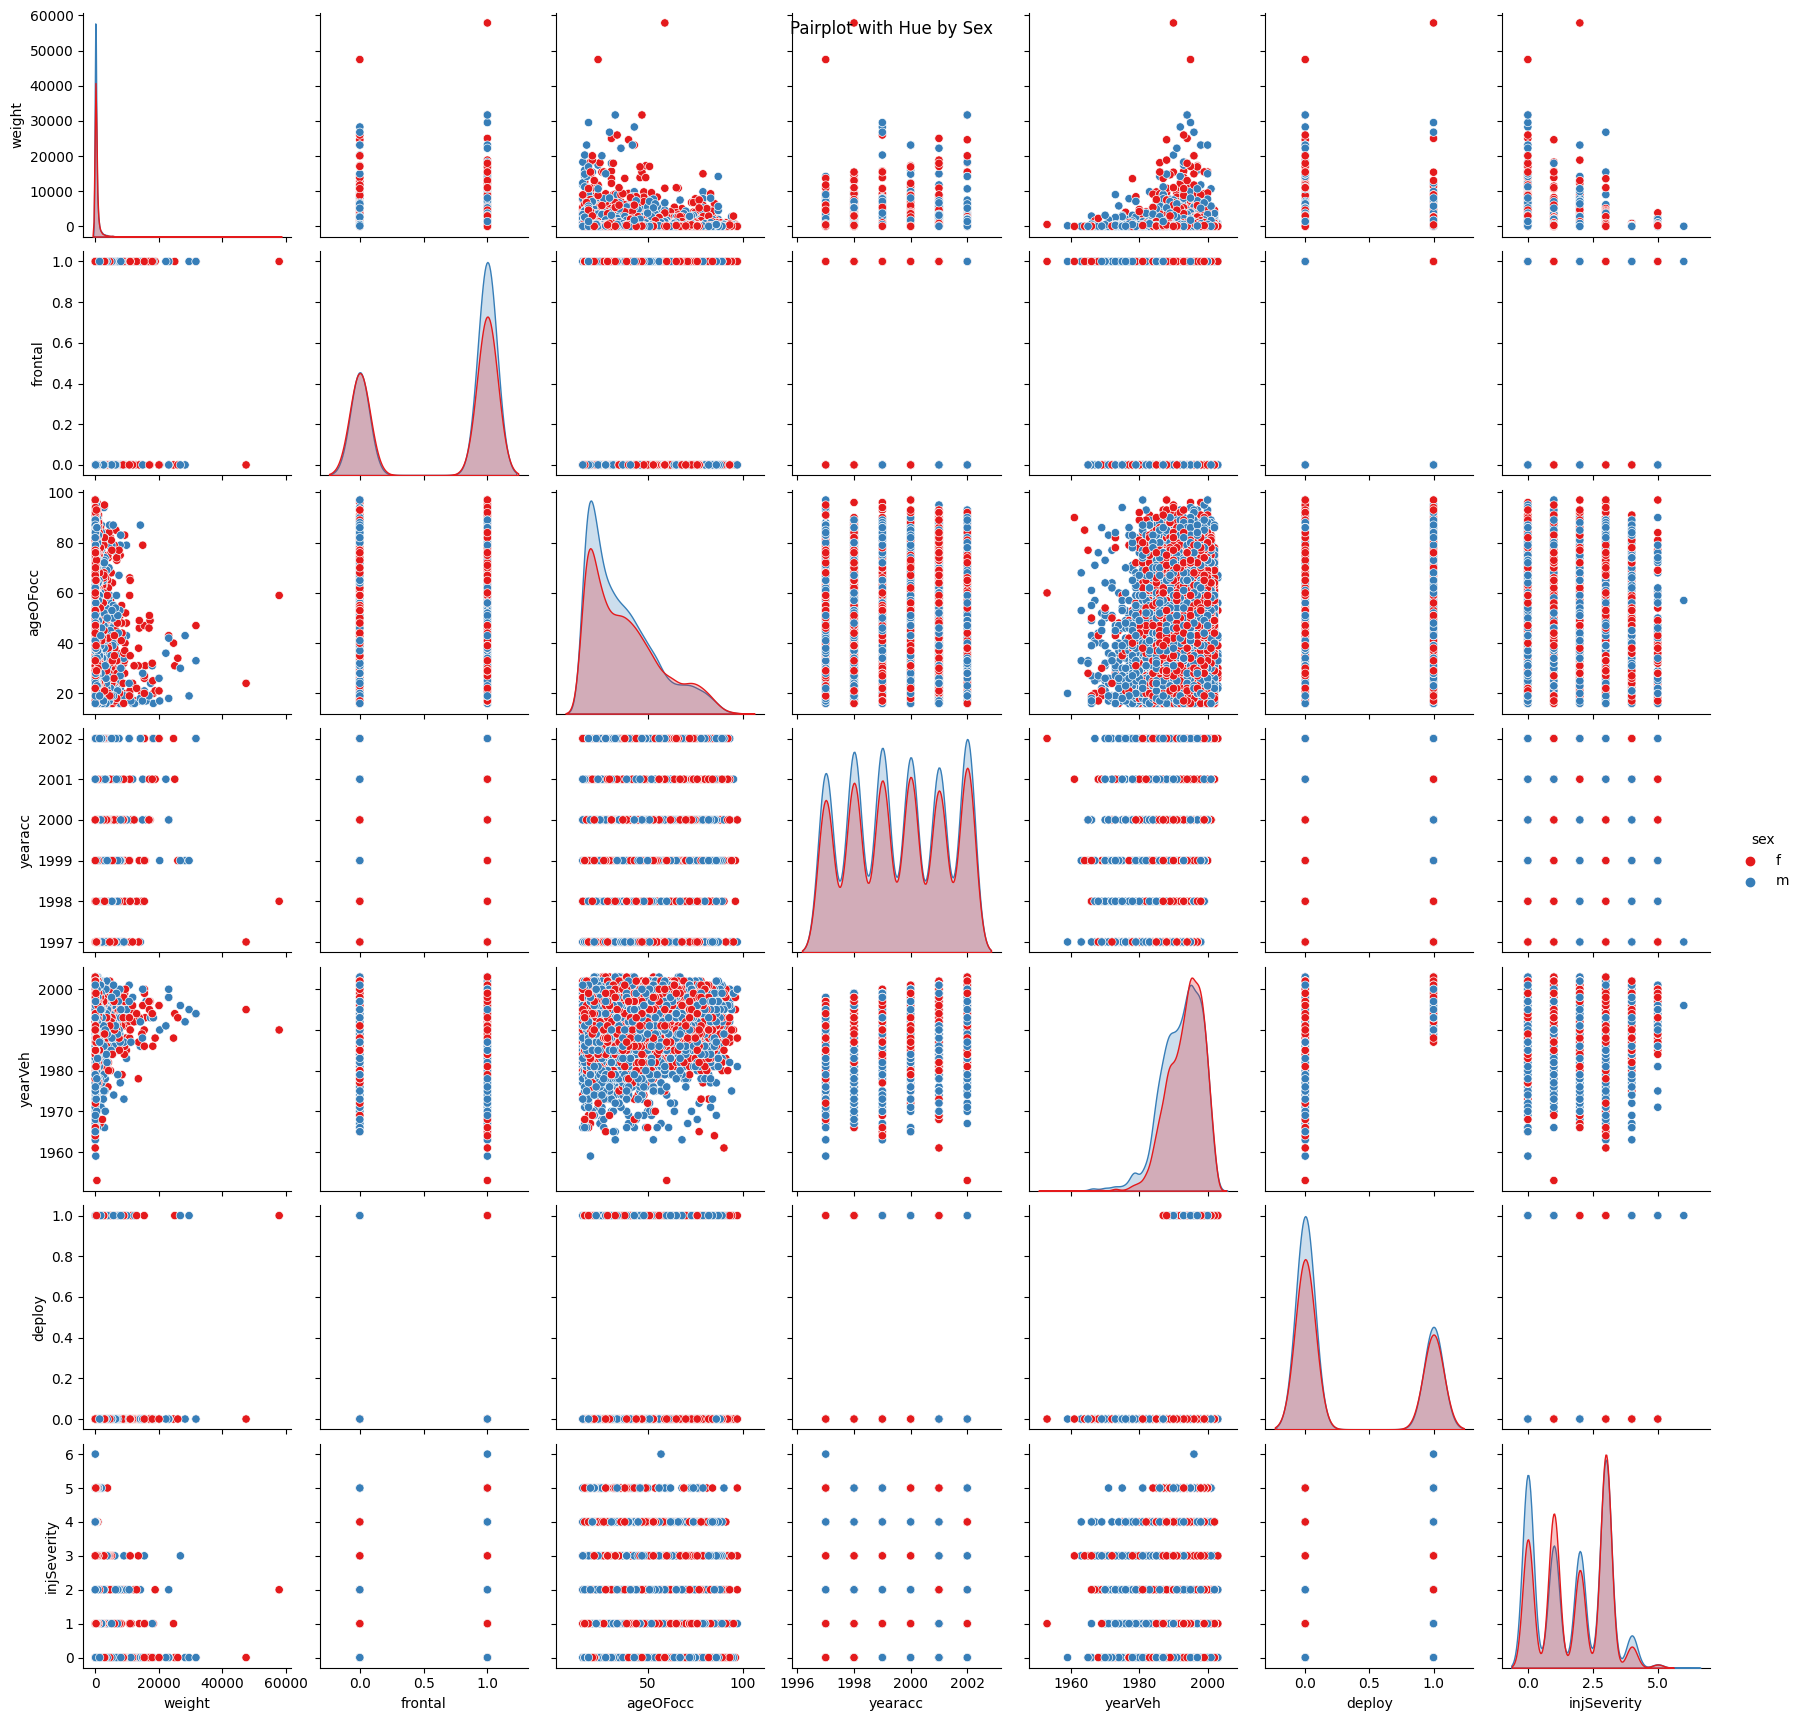

In [35]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=data, hue='sex', palette='Set1')
plt.suptitle('Pairplot with Hue by Sex')
plt.show()

### Swarm Plot

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='sex', y='ageOFocc', palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Age of Occupant')
plt.title('Age of Occupant by Sex')
plt.show()